# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as date
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

units = "metric"
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=" + units



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | cable beach
City not found. Skipping...
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | oriximina
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | galeana
Processing Record 8 of Set 1 | holualoa
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | mejit
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | dogondoutchi
Processing Record 18 of Set 1 | prado
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,20.14,57,100,0.89,US,1694809056
1,atafu village,-8.5421,-172.5159,28.27,73,20,5.49,TK,1694809056
2,oriximina,-1.7656,-55.8661,37.25,26,34,3.33,BR,1694809057
3,klyuchi,52.2667,79.1667,13.78,82,100,2.19,RU,1694809057
4,galeana,24.8333,-100.0667,28.25,35,14,5.97,MX,1694809057


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,20.14,57,100,0.89,US,1694809056
1,atafu village,-8.5421,-172.5159,28.27,73,20,5.49,TK,1694809056
2,oriximina,-1.7656,-55.8661,37.25,26,34,3.33,BR,1694809057
3,klyuchi,52.2667,79.1667,13.78,82,100,2.19,RU,1694809057
4,galeana,24.8333,-100.0667,28.25,35,14,5.97,MX,1694809057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

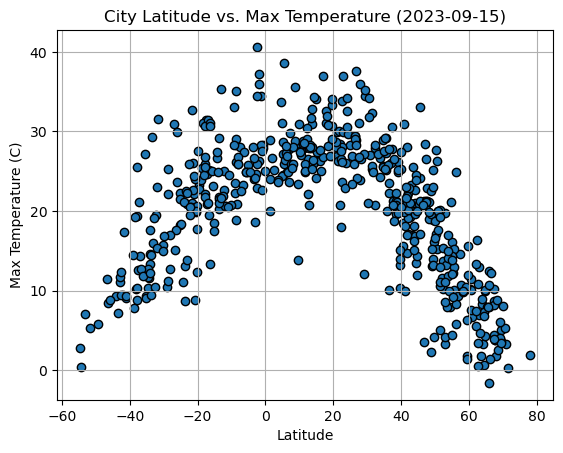

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat,temp,edgecolors="black")

# Incorporate the other graph properties
data_date = city_data_df["Date"].values[0]
data_date = date.date.fromtimestamp(data_date)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

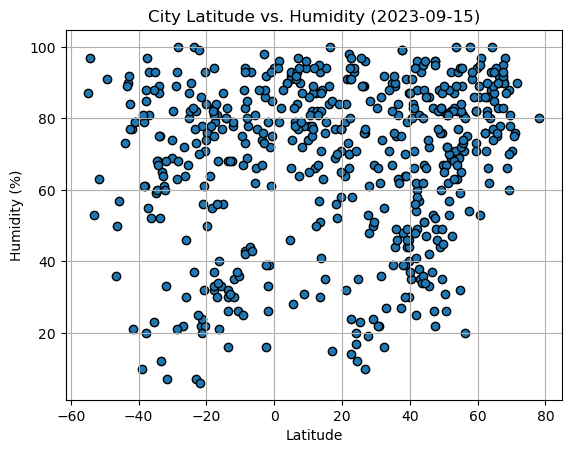

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(lat,humidity,edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

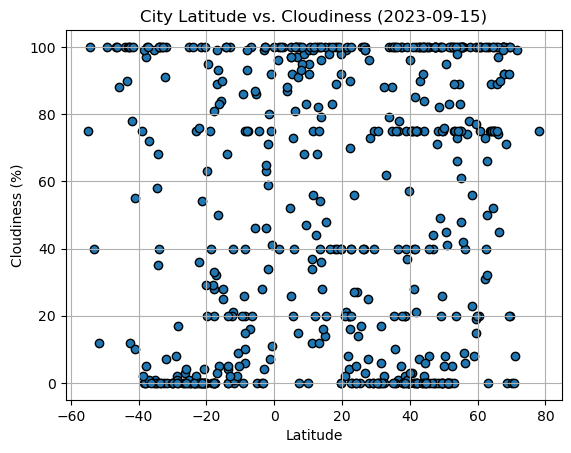

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat,cloudiness,edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

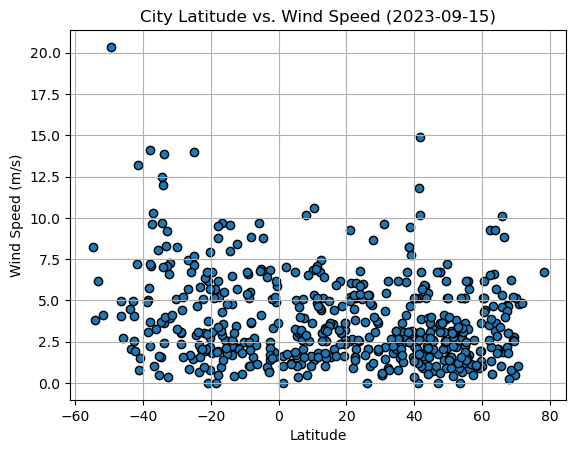

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lat,wind_speed,edgecolors="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({data_date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linregress_plots(x_val,y_val,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(0.2,0.2),xycoords='figure fraction',fontsize=15,color="red")
    
    print(f'The Pearson Coerrelation Coefficient, r = {rvalue}\nThe Coefficient of Determination r-saqured = {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,20.14,57,100,0.89,US,1694809056
3,klyuchi,52.2667,79.1667,13.78,82,100,2.19,RU,1694809057
4,galeana,24.8333,-100.0667,28.25,35,14,5.97,MX,1694809057
5,holualoa,19.6228,-155.9522,26.97,77,40,3.60,US,1694809057
7,iskateley,67.6803,53.1512,3.78,90,92,3.03,RU,1694809058


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.27,73,20,5.49,TK,1694809056
2,oriximina,-1.7656,-55.8661,37.25,26,34,3.33,BR,1694809057
6,margaret river,-33.9500,115.0667,14.55,89,100,3.64,AU,1694809058
9,papatowai,-46.5619,169.4708,11.44,36,100,4.04,NZ,1694809058
10,puerto natales,-51.7236,-72.4875,5.31,63,12,4.14,CL,1694809058


###  Temperature vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = -0.8030249261838016
The Coefficient of Determination r-saqured = 0.6448490320725


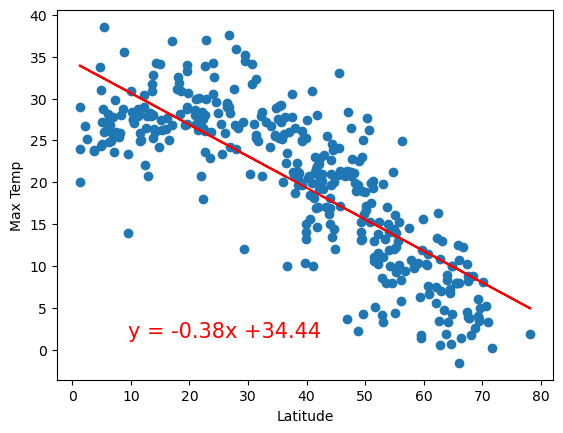

In [15]:
# Linear regression on Northern Hemisphere

n_lat = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = 0.7472782808750001
The Coefficient of Determination r-saqured = 0.5584248290674956


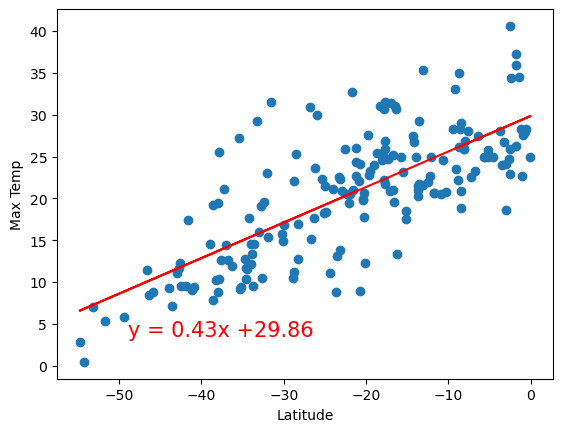

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

s_lat = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** The Northern Hemisphere Latitude vs Max Temp shows a strong negative correlation with r = -0.80 and r-squared = 0.64. The Southern Hemisphere Lattitude vs Max Temp shows a strong positive correlation with r = 0.75 and r-squared = 0.56. This is to be expected as we see higher temperatures moving towards the equator where Latitude = 0.

### Humidity vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.05171074553702512
The Coefficient of Determination r-saqured = 0.0026740012039949634


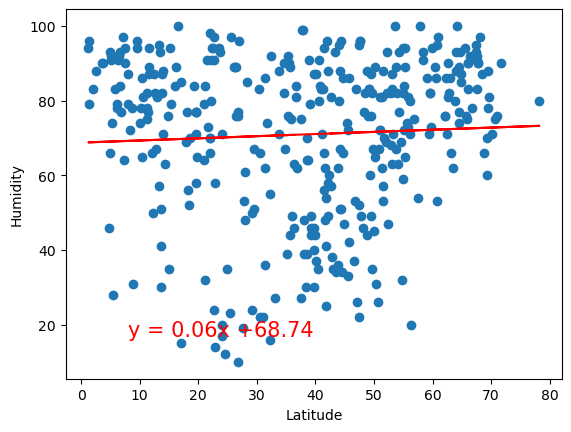

In [17]:
# Northern Hemisphere

y_val = northern_hemi_df["Humidity"]
ylabel = "Humidity"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = -0.04964864362311874
The Coefficient of Determination r-saqured = 0.0024649878136154494


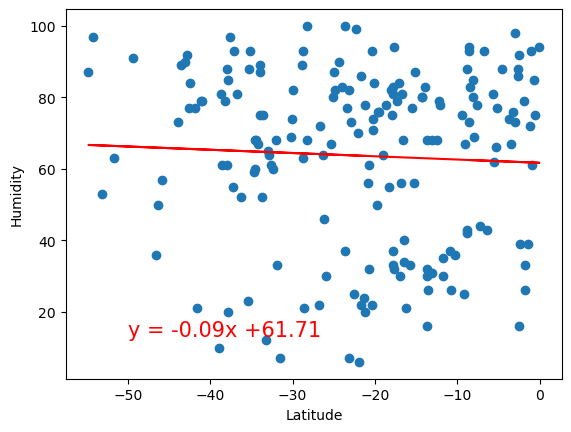

In [18]:
# Southern Hemisphere

y_val = southern_hemi_df["Humidity"]
ylabel = "Humidity"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** Significant scatter is observed and there is no meaningful correlation between Latitude vs Humidity for either Northern or Southern Hemispheres. There is no relation that can be well accounted for by these two factors and this data alone.

### Cloudiness vs. Latitude Linear Regression Plot

The Pearson Coerrelation Coefficient, r = 0.004887538325181559
The Coefficient of Determination r-saqured = 2.388803088011856e-05


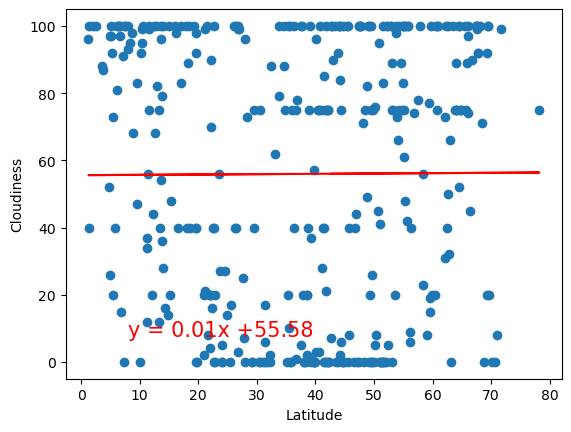

In [19]:
# Northern Hemisphere

y_val = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = -0.07556021455747229
The Coefficient of Determination r-saqured = 0.005709346023971247


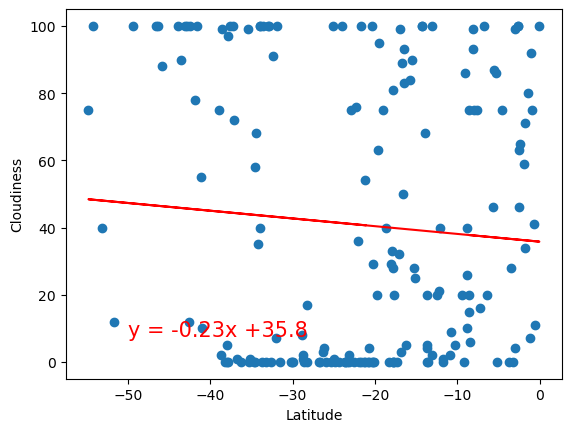

In [20]:
# Southern Hemisphere

y_val = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** Significant scatter is observed and there is no meaningful correlation between Latitude vs Cloudiness for either Northern or Southern Hemispheres. There is no relation that can be well accounted for by these two factors and this data alone.

The Pearson Coerrelation Coefficient, r = -0.03254592145478139
The Coefficient of Determination r-saqured = 0.0010592370033407996


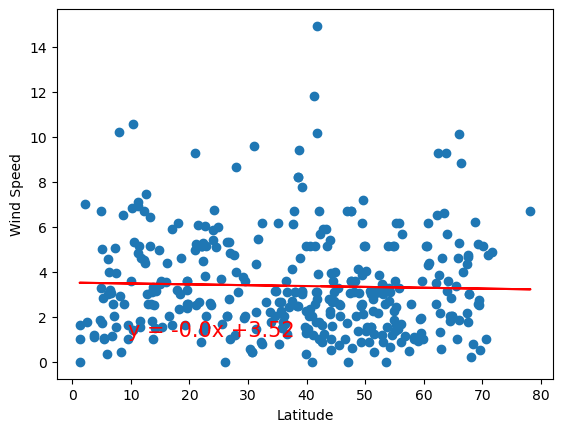

In [21]:
# Northern Hemisphere

y_val = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(n_lat,y_val,xlabel,ylabel)

The Pearson Coerrelation Coefficient, r = -0.23034196889543038
The Coefficient of Determination r-saqured = 0.053057422634623416


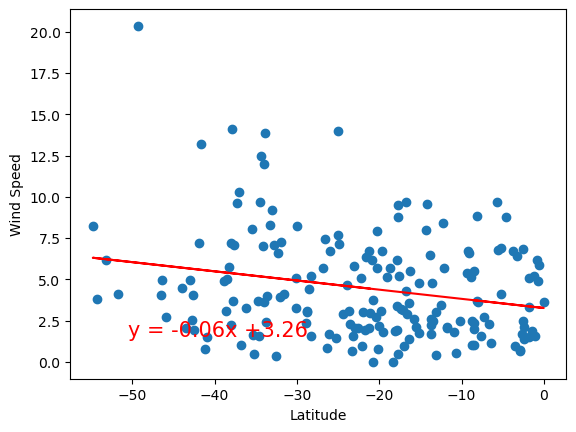

In [22]:
# Southern Hemisphere

y_val = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"

linregress_plots(s_lat,y_val,xlabel,ylabel)

**Discussion about the linear relationship:** Significant scatter is observed and there is no meaningful correlation between Latitude vs Wind Speed for either Northern or Southern Hemispheres. There is no relation that can be well accounted for by these two factors and this data alone.